<a href="https://colab.research.google.com/github/samsyano/CNN-Food-Multiclassifier-/blob/main/ComputerVision_Food_Bi_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Extract image file

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-06-10 10:42:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 142.250.99.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   131MB/s    in 0.8s    

2023-06-10 10:42:09 (131 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



Data Inspection

(for computer vision project, that means visualizing different samples of the data)

In [ ]:
!ls pizza_steak


test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
# !ls pizza_steak/train/pizza/

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# find the number of files in a specific directory
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the classnames programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*"))) #Created a list of class_names from the subdirectories
# class_names = class_names[:]
print(class_names)

['pizza' 'steak']


In [ ]:
# Visualizing Images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  print(random_image[0])

  # Read in the image and plot
  img =mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {img.shape}")

  return img


['389739.jpg']
389739.jpg
Image Shape: (384, 512, 3)


array([[[ 39,  15,  13],
        [ 39,  15,  13],
        [ 40,  16,  14],
        ...,
        [140, 186, 210],
        [140, 184, 211],
        [140, 184, 211]],

       [[ 40,  16,  14],
        [ 40,  16,  14],
        [ 40,  16,  14],
        ...,
        [116, 158, 174],
        [114, 153, 170],
        [111, 150, 167]],

       [[ 43,  19,  17],
        [ 42,  18,  16],
        [ 41,  17,  15],
        ...,
        [ 92, 125, 132],
        [ 87, 117, 125],
        [ 82, 112, 120]],

       ...,

       [[ 26,  18,  16],
        [ 24,  16,  14],
        [ 24,  16,  14],
        ...,
        [ 40,  21,  23],
        [ 39,  20,  22],
        [ 38,  19,  21]],

       [[ 34,  26,  24],
        [ 28,  20,  18],
        [ 23,  15,  13],
        ...,
        [ 39,  23,  26],
        [ 37,  21,  24],
        [ 36,  20,  23]],

       [[ 22,  14,  12],
        [ 20,  12,  10],
        [ 21,  13,  11],
        ...,
        [ 36,  21,  24],
        [ 34,  19,  22],
        [ 33,  18,  21]]

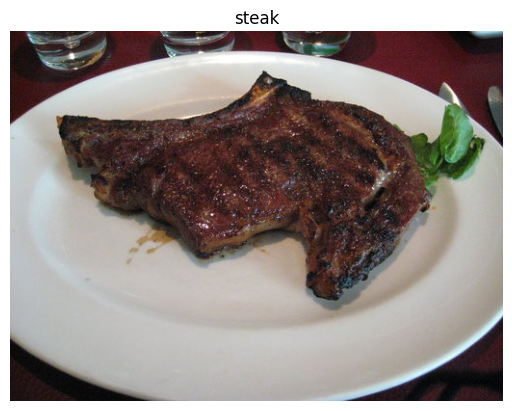

In [ ]:
# View random image

img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")
img

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed

# proprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


# setup paths to data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                               )

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                               )

# Build a CNN model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile CNN
model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])

len(train_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


47

In [ ]:
# Fit model
history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


KeyboardInterrupt: ignored

In [ ]:
model_1.summary()

In [ ]:
# Create Model 2
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])

history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [ ]:
# Has more parameters than model 1, but perform poorly compare to model 1
model_2.summary()

In [ ]:
# Create Model 3
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow Playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])

history_3 = model_3.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [ ]:
model_3.summary()

In [ ]:
# New Model

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
#  check the infor on process used

# !nvidia-smi
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
# Preprocessing
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_datagen

In [ ]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224), class_mode="binary",
                                               batch_size=20)


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224), class_mode="binary",
                                               batch_size=20)

In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() #get the "next" batch of images/labels in train_data
len(images), len(labels), len(train_data)

Create a CNN Model


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') #output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
#  Compile the model

# model_4.compile(loss="binary_crossentropy",
#                 optimizer=Adam(),
#                 metrics=["accuracy"])


model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


In [ ]:
# Evaluate the Model

import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot the validation and training curves separately

def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy =history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
plot_loss_curves(history_4)

Increasing the conv NN increases overfitting

To reduce overfitting
- Add data augmentation
- Add regularization layers (such as MaxPool2D)
- Add more data

In [ ]:
# Create the model (this is going to be our new baseline)

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

In [ ]:
model_5.summary()

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same


In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
print(random_number)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)



```
# Upload an image and use it for prediction
```



In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from PIL import Image

# !wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg


In [ ]:
# steak = mpimg.imread("pizza_steak/3-steak")
# plt.imshow(steak)
# plt.axis("off")

# from PIL import Image
# img = Image.open('03-steak.jpg')
# img

In [ ]:
# Function to import and resize image

def load_and_prep_image(filename, img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img


In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak